#SAI SRIKANTH SARABU
#CW ID: A20343781

In [21]:
#importing packages
import pandas as pd
import numpy as np
from numpy.linalg import norm

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
training_dataPath= '/content/drive/MyDrive/Sample Data/Assignment-5/training_dataset.csv' #paths of training and test data set
testing_dataPath = '/content/drive/MyDrive/Sample Data/Assignment-5/test_dataset.csv'

In [24]:
trainData = pd.read_csv(training_dataPath)          #creating dataframe by reading csv file 
utilMat = trainData.pivot_table(index='item_id', columns='user_id', values='rating')    #forming a table from dataframe with movies as rows and users as columns
utilMat = utilMat.replace(np.nan, 0)                #assigning the value of empty instance to zero

In [25]:
#Below we are making nested dictionary with key as users and value as a dictionary of movies and values as rating of traning data
movies = set()                                      #initializing set to add unique movies in training dataset
trainDict = {}                                      #initializing empty dictionary
with open(training_dataPath) as f:                  #opening training dataset file 
  next(f)                                           #ignoring the first row as it is names of the column
  for line in f:                                   #iterating through each line
    lis = line.split(',')                          #spliting the csv file with ','
    movies.add(int(lis[1]))                        #adding movies to the set
    usr = int(lis[0])                              #storing user id in a temporary variable
    mov = int(lis[1])                              #storing item id in a temporary variable
    rat = int(lis[2])                              #storing rating in a temporary variable
    if usr not in trainDict.keys():                 #checking if user id is already added in the dictionary
      temp_dict={mov:rat}                           #creating a temporary dictionary of movie id and rating
      trainDict[usr] = temp_dict                    #adding temporary dictionary to the training dictionary
    else:                           
      if mov not in trainDict[usr]:                 #if the user is already present checking for the movie id to add    
        temp_dict2={mov:rat}                        #creating temporary dictionary of movie id and rating 
        trainDict[usr].update(temp_dict2)           #updating the training dictionary data main dictionary

In [26]:
#Below we are making nested dictionary with key as users and value as a dictionary of movies and values as rating of testing data
testusers = set()                                 #initializing set to add unique user ids in training dataset
testMovies = set()                                #initializing set to add unique movies in training dataset
testDict = {}                                     #initializing empty dictionary
with open(testing_dataPath) as f:                 #opening test file 
  next(f)                                         #ignoring the first row as it is names of the column
  for line in f:
    lis = line.split(',')                         #spliting the csv file with ','
    testusers.add(int(lis[0]))                    #adding users to the set
    testMovies.add(int(lis[1]))                   #adding movies to the set
    usr = int(lis[0])                             #storing user id in a temporary variable
    mov = int(lis[1])                             #storing user id in a temporary variable
    rat = int(lis[2])                             #storing rating in a temporary variable
    if usr not in testDict.keys():                #checking if user id is already added in the dictionary
      temp_dict={mov:rat}                         #creating a temporary dictionary of movie id and rating        
      testDict[usr] = temp_dict                   #adding temporary dictionary to the training dictionary
    else:
      if mov not in testDict[usr]:                #if the user is already present checking for the movie id to add  
        temp_dict2={mov:rat}                      #creating temporary dictionary of movie id and rating            
        testDict[usr].update(temp_dict2)          #updating the testing dictionary data main dictionary

##Calculating RMSE of Collaborative Filtering with cosine similarity



In [27]:
#below function returns predicted rating and actual rating after performing cosine similarity between movie rating of user from testing data and corresponding
#user rated movies and taking wighted average between all the similarities above treshold.
def getRatings(utilMat, t):                           
  predRating = []                                     #initializing empty list to add all predicted rating
  ActualRating = []                                   #initializing empty list to add all actual rating
  for k in testDict.keys():                           #iterating over all the users from test dictionary      
    for j in list(testDict[k].keys()):                #iterating over each users movie id 
      if j in movies:                                 #checking if the movie is present in testing data
        sumNum = 0                                    #initializing numerator as zero
        sumDen = 0                                    #initializing numerator as zero
        for i in list(trainDict[k].keys()):           #iterating over all movies of the user in traing dataset
          a = np.array(utilMat.loc[j])                #making numpy array of all the user rating of that particular movie
          b = np.array(utilMat.loc[i])                #making numpy array of all the user rating of that particular movie
          sim = np.dot(a, b)/norm(a)*norm(b)          #dot product of of 2 vectors divided by cross product of those same vectors gives ys cosine similarity
          if sim > t:                                 #if the similarity is greater than threshold
            sumNum += sim*trainDict[k][i]             #summing up all the product of similarity and rating value other movies rated by same user
            sumDen +=sim                              #summping up all the similarities
        predRating.append(round(sumNum/sumDen,4))     #appending predicted rating to the list
      else:
        predRating.append(0)                          #returning zero for all the movies that are not present in the training data
      ActualRating.append(testDict[k][j])             #appending actual rating to the list
  return predRating, ActualRating                     #returning both actual and predicted rating  

In [28]:
#given function from the question to find RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(y_actual, y_predicted):
  rms = mean_squared_error(y_actual, y_predicted, squared=False)
  return round(rms,4)

In [29]:
predRating, ActualRating = getRatings(utilMat, 0.5) #calling getRating to get actual and predicted rating by sending utility matrix and treshold as parameters

**RMSE for Collaborative Filtering with cosine similarity**

In [30]:
a = RMSE(ActualRating,predRating)            
print(a)           

1.0984


#BONUS

##Calculating RMSE of Global baseline estimates

In [31]:
utilMat = utilMat.replace({0:np.nan})           #replacing zeros with nan(not a number) to compute easily

overallMean = np.nanmean(utilMat)              #taking mean of all the movies present in the dataset, nan mean will only take mean of number ignoring NaN

In [32]:
userMeanDict = {}                               #Initializing dictonary to get user mean 
for i in testusers:                             #iterating over all the test dataset users
  userMeanDict[i] = round(np.nanmean(utilMat[i]),4)           #taking mean of each users rating and assigning it dictionary userid as key and mean as value

In [33]:
movieMeanDict = {}                              #Initializing dictonary to get movie mean 
for i in testMovies:                            #iterating over all the test dataset movies
  if i in movies:                               #checking if the movie is present or not in training data or not
    movieMeanDict[i] = round(np.nanmean(utilMat.loc[i]),4)      #taking mean of each movie rating and assigning it dictionary userid as key and mean as value
  else:
    movieMeanDict[i] = 0                                        #assigning mean value as zero if there is no movie present in 

In [34]:
gPredictedRaing = []                            #initializing list to assign predicted rating
gActualRating = []                              #initializing list to assign actual rating
for k in testDict.keys():                       #iterating over all th users in test data
  for j in list(testDict[k].keys()):            #iterating over each user rated movies
    if j in movies:                             #checking if the movie is present in the train data
    #calculating global baseline  by the for formula 𝑅𝑥𝑖 = 𝜇 + 𝑅𝑥∗ + 𝑅𝑖∗, here 𝜇 is mean of all the movie ratings, 𝑅𝑥∗ is Average rating of user x-𝜇, 𝑅i∗ is Average rating of user i-𝜇,
    #adding those gives us  𝜇+x-𝜇+i-𝜇 = x+i-𝜇, therefore below I am adding average movie rating + average user rating - all the movie rating mean
      gPredictedRaing.append(userMeanDict[k] + movieMeanDict[j] - overallMean)        
    else:
      gPredictedRaing.append(0)                 #adding zero to the list of predicted arting
    gActualRating.append(testDict[k][j])        #adding actual movie rating to the actual list

**RMSE for Global baseline estimates**

In [35]:
b = RMSE(gActualRating,gPredictedRaing)
print(b)

0.9552


##Calculating RMSE of Collaborative Filtering with adjusted cosine similarity



In [36]:

utilMat = utilMat.replace({0:np.nan})                 #replacing utility matrix with nan(not a number) to compute adjusted cosine similarity
for i in utilMat.columns:                             #iterating over all the columns(users) of the training dataset
  utilMat[i] = utilMat[i] - round(np.nanmean(utilMat[i]),4)     #subtracting the mean value of user from each movie rating

utilMat = utilMat.replace(np.nan, 0)                  #again changing nan to zeros

adPredRating, ActualRating = getRatings(utilMat, 0.5)   #calling getRating to get actual and predicted rating by sending utility matrix and threshold as parameters

**RMSE for Collaborative Filtering with adjusted cosine similarity**

In [37]:
c = RMSE(ActualRating,adPredRating)
print(c)

0.9268


##Comparision

**Comparision of Collaborative filtering with consine similarity, adjusted cosine similarity and global baseline estimates**

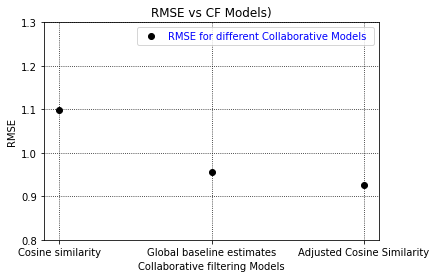

In [38]:
#graph for Collaborative filtering models vs RMSE for Manhattan distance
import matplotlib.pyplot as plt   
X = [a,b,c]
Y = ['Cosine similarity', 'Global baseline estimates', 'Adjusted Cosine Similarity']
plt.plot(Y,X, 'o', label="RMSE for different Collaborative Models ", color='black');
plt.grid(True,color='k',linestyle=':')
plt.title("RMSE vs CF Models)");
plt.xlabel("Collaborative filtering Models"); 
plt.ylabel("RMSE");
plt.ylim(0.8, 1.3)
leg = plt.legend(loc=0);
for text in leg.get_texts():
  text.set_color("blue")

RMSE for Collaborative filtering with **cosine similarity is 1.0984** , with **global baseline estimates is 0.9552** ,and with **adjusted cosine similarity is  0.9268**.
The RMSE for CF model with consine similarity is slightly higher because of not taking users rating into calculation of predicted ratings, as we are not considering other user perspectives for the movie rating, Where in the adjusted cosine similarity metric, we are normalizing the movie rating by subtracting the user mean and then calculating the predicted rating that is the reason we are getting lower RMSE than normal cosine similarity metric. For Global Baseline estimates, we are taking all movie average rating and each movie average rating for that particulat user, therefore it is not accurate as we are considering all the movie rating as metric. 